Matteo Picciolini

# Esercitazione 1


In [1]:
#matplotlib
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#numpy
import numpy as np

#fit
from scipy.optimize import curve_fit
from scipy.stats import norm, cauchy

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Esercizio 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$.
2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$.
3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... but before judging you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution.

### Risoluzione

In questo esercizio verifico il corretto funzionamento del generatore di numeri casuali che verrà utilizzato in questa e nelle prossime esercitazioni.

#### Verifica del valor medio atteso

E' necessario verificare che i numeri estratti tramite il generatore abbiano valor medio e varianza consistenti rispetto alla distribuzione di probabilità da cui vengono estratti. Tutte le distribuzioni di probabiltà sono campionate a partire dal campionamento della distribuzione uniforme sull'intervallo $\left[0, 1 \right]$, quindi verrà di seguito verificato il corretto funzionamento di questo generatore. In particolare, si deve osservare che il valor medio delle estrazioni sia $\langle r \rangle = \int_0^1 r dr = 1/2$.

Per la stima di $\langle r \rangle$ e la sua incertezza, si è utilizzato il metodo del *data blocking*. Date $M$ estrazioni, si identificano $N$ blocchi da $L=\frac{M}{N}$ estrazioni e per ogni blocco si effettua la media statistica delle sue estrazioni. Successivamente, si calcola la media delle medie dei blocchi e si stima l'errore statistico come la deviazione standard delle medie dei blocchi divisa per la radice quadrata del numero di blocchi, andando così a ottenere una media progressiva della variabile di interesse. In questo modo, qualora le singole estrazioni fossero correlate, le medie ottenute dai blocchi risulterebbero scorrelate. 

L'incertezza statistica relativa all'$i$-esimo blocco (ovvero la deviazione standard della media) si ricava con la formula:

$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N r^2_i - \left( \frac{1}{N} \sum_{i=1}^N r_i \right)^2 \right]} ,$$
dove
$$ \langle r^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N r^2_i \quad \quad \langle r\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N r_i \right)^2 . $$
Quindi:
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left( \langle r^2\rangle -\langle r \rangle^2 \right)} .$$

Questa formula non è, ovviamente, utilizzabile per $N=1$, quindi per il primo blocco l'incertezza è convenzionalmente fissata a $0$.

Di seguito ho riportato il risultato di questa operazione in forma di grafico. Il codice che ha effettuato questo calcolo è stato scritto in `C++`, mentre il plot è stato realizzato con `Python 3`. La comunicazione tra `Python 3` e `C++` è garantita attraverso i file `.dat` contenuti nella cartella `Data`.

Il codice `C++` che ho implementato è in grado di utilizzare due metodi diversi per il calcolo della media a blocchi. Il primo modo, più semplice e intuitivo, utilizza due cicli for, uno per calcolare e salvare in un `vector` le medie dei blocchi (e i quadrati delle medie), mentre l'altro per calcolare l'incertezza sulla media. Il secondo metodo, invece, permette di ottenere lo stesso risultato ma utilizzando un solo ciclo for. La maggiore rapidità del codice è però a scapito della semplicità e riutilizzabilità del codice: per ottenere un codice da utilizzare per gli altri esercizi, ho dovuto fare uso dei puntatori a funzione. Per maggiori dettagli è possibile consultare il codice sorgente. Le funzione di interesse sono `average_calc`, `blocks_averege` nel file `Library_01.cpp`.

Per queste simulazioni ho utilizzato $M=10^7$ e $N=100$.

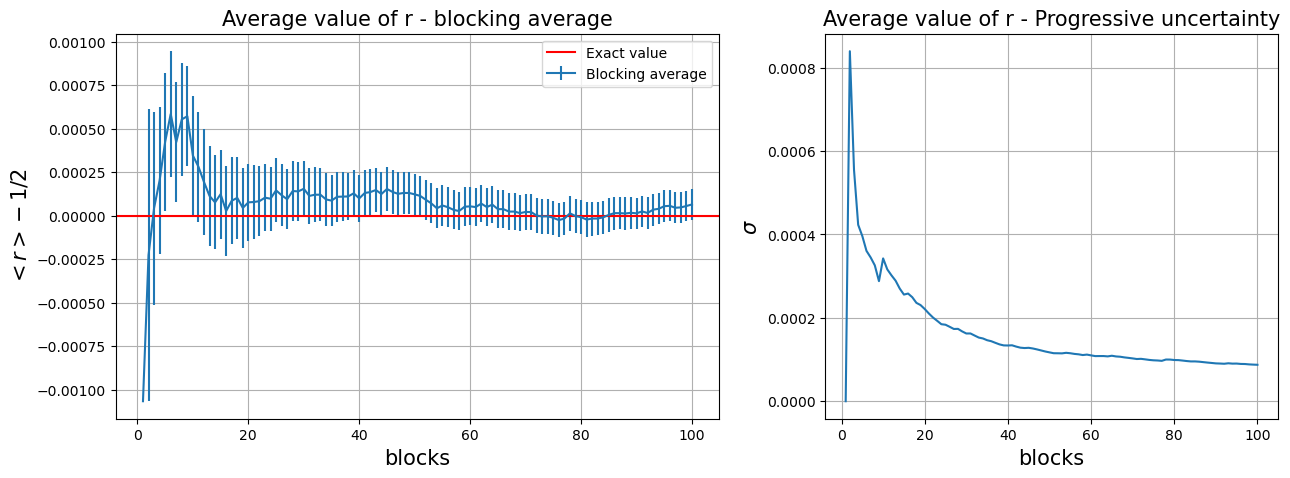

In [2]:
#data acquisition
x_label, progressive_sum, progressive_error = np.loadtxt('../Data/01.1a_mean_value_random_generator_M1.dat',
                                                          unpack = True, usecols = (0, 1, 2))

#style
fig, axs = plt.subplots(1, 2, gridspec_kw = {'width_ratios': [2, 1.5]}, figsize = (15, 5))

#plot 1
axs[0].errorbar(x_label,progressive_sum - 0.5, yerr = progressive_error, label = "Blocking average")
axs[0].axhline(0, ls = '-', c = 'red', label = "Exact value")
#style plot 1
axs[0].set_xlabel('blocks', fontsize = 15)
axs[0].set_ylabel('$<r>-1/2$', fontsize = 15)
axs[0].grid(True)
axs[0].set_title('Average value of r - blocking average', fontsize = 15)
axs[0].legend()

#plot 2
axs[1].plot(x_label, progressive_error, label = "Progressive uncertainty")
#style plot 2
axs[1].set_ylabel('$\sigma$', fontsize = 15)
axs[1].set_xlabel('blocks', fontsize = 15)
axs[1].set_title('Average value of r - Progressive uncertainty', fontsize = 15)
axs[1].grid(True)

plt.show()

In questi grafico mostro l'andamento della differenza tra il valore aspettato e il valore medio di $r$ calcolato con il metodo del *data blocking*. Come si può vedere, il valore calcolato è compatibile con il valore atteso e l'errore statistico associato alla misura tende a diminuire all'aumentare del numero di lanci.

#### Stima dell'incertezza sulla misura

Ho utilizzato la stessa tecnica per calcolare $\langle \sigma^2 \rangle = \int_0^1 (r-1/2)^2 dr$, accumulando in una variabile d'appoggio la quantità $\left(r- \frac{1}{2}\right)^2$ e successivamente mediando sui blocchi. Si riportano di seguito i dati ottenuti.

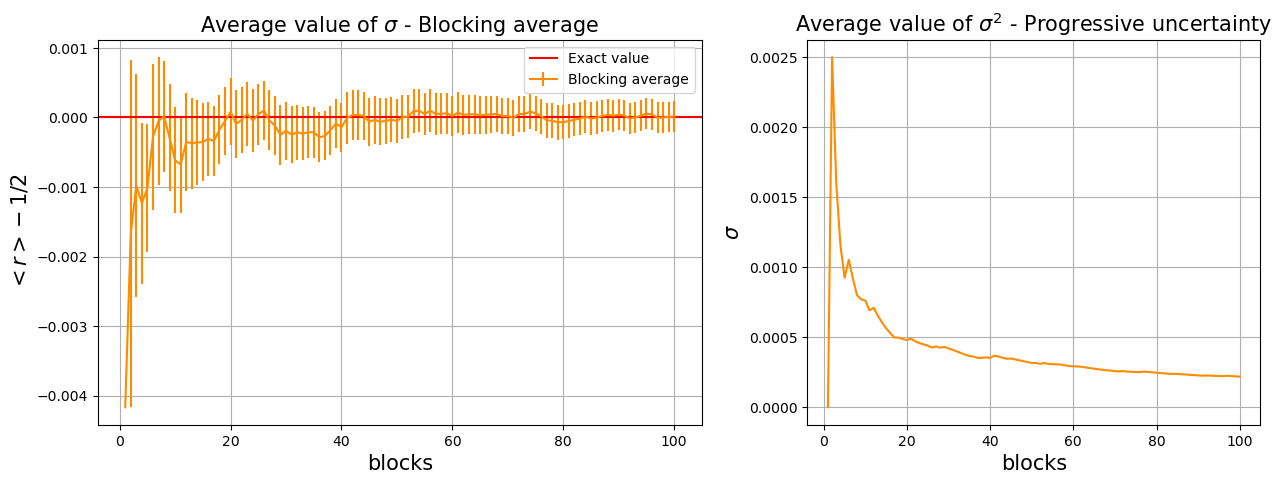

In [3]:
#data acquisition
x_label, progressive_sum, progressive_error = np.loadtxt('../Data/01.1b_mean_value_standard_deviation_M2.dat', 
                                                         usecols = (0,1,2), unpack = True)

#style
fig, axs = plt.subplots(1, 2, gridspec_kw = {'width_ratios': [2, 1.5]}, figsize = (15, 5))

#plot 1
axs[0].errorbar(x_label,progressive_sum - 1/12, yerr = progressive_error, 
                label = "Blocking average", c = "darkorange")
axs[0].axhline(0, ls = '-',c = 'red', label = "Exact value")
#style plot 1
axs[0].set_xlabel('blocks', fontsize = 15)
axs[0].set_ylabel('$<r>-1/2$', fontsize = 15)
axs[0].grid(True)
axs[0].set_title('Average value of $\sigma$ - Blocking average', fontsize = 15)
axs[0].legend()

#plot 2
axs[1].plot(x_label, progressive_error, label = "Progressive uncertainty", c = 'darkorange')
#style plot 2
axs[1].set_ylabel('$\sigma$', fontsize = 15)
axs[1].set_xlabel('blocks', fontsize = 15)
axs[1].set_title('Average value of $\sigma^2$ - Progressive uncertainty', fontsize = 15)
axs[1].grid(True)

plt.show()

#### Test del $\chi^2$
Si effettua un test del $\chi^2$ per verificare ancora una volta se l'ipotesi di numeri estratti secondo una distribuzione uniforme possa essere accettata o rigettata. Tramite il test del $\chi^2$, infatti, posso valutare la probabilità che la distribuzione da cui viene estratto un numero casuale non sia quella ho assunto.

Ho quindi diviso l'intervallo $\left[0, 1\right]$ in $M$ intervalli di lunghezza uguale e ho classificato i numeri estratti dal generatore in base al loro intervallo di appartenenza, in modo da ottenere il numero di eventi osservati all'interno di ogni intervallo. Per implementare il test ho seguito le indicazioni della consegna.

Di seguito riporto il risultato del test in forma grafica, dal quale si può intuire il corretto funzionamento del generatore di numeri casuali.

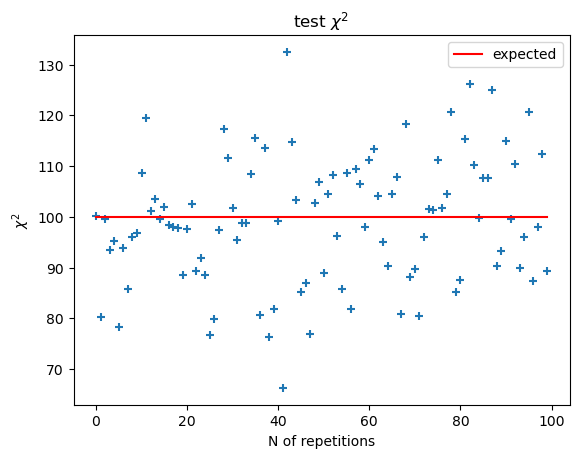

<Chi^2> (expected 100): 
99.12718


In [4]:
#data acquisition
x_label, chi = np.loadtxt("../Data/01.1c_chi_squared.dat", unpack = True)

#style
plt.title('test $\chi^2$')
plt.xlabel('N of repetitions')
plt.ylabel('$\chi^2$')

#plot
plt.scatter(x_label, chi, marker = '+')
g = np.full(x_label.size, 100)
plt.plot(x_label, g, c = 'red', label = 'expected')

#legend
plt.legend()

plt.show()

print('<Chi^2> (expected 100): ')
print(np.mean(chi))

## Esercizio 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. Add two probability distributionsby using the **method of the inversion of the cumulative distribution** to sample from a **generic** exponential distribution, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ , and a **generic** Cauchy-Lorentz distribution$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.
2. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

### Risoluzione

In questo esercizio, l'obiettivo è estendere le funzionalità del Generatore di Numeri Pseudo-Random e verificare la validità del Teorema del Limite Centrale. Il Teorema del Limite Centrale afferma che, sotto determinate condizioni, la somma di un grande numero di variabili casuali indipendenti e identicamente distribuite, ciascuna con media finita e varianza finita, tende a distribuirsi come una distribuzione gaussiana, indipendentemente dalla forma di distribuzione delle singole variabili casuali.

Di seguito mostro la validità del Teorema del Limite Centrale utilizzando alcune distribuzioni. Nello specifico genero stocasticamente valori secondo la distribuzione uniforme e quella esponenziale (entrambe distribuzioni con varianza finita) e mostro che le somme delle estrazioni $S_N = \frac{1}{N} \sum_{i=1}^{N}x_i$ si distribuiscono convergendo a una distribuzione gaussiana. Estraggo poi numeri casuali a partire dalla distribuzione di Cauchy-Lorentz e mostro che per tale distribuzione non vale il teorema del limite centrale in quanto questa non ha varianza finita.

#### Distribuzione uniforme

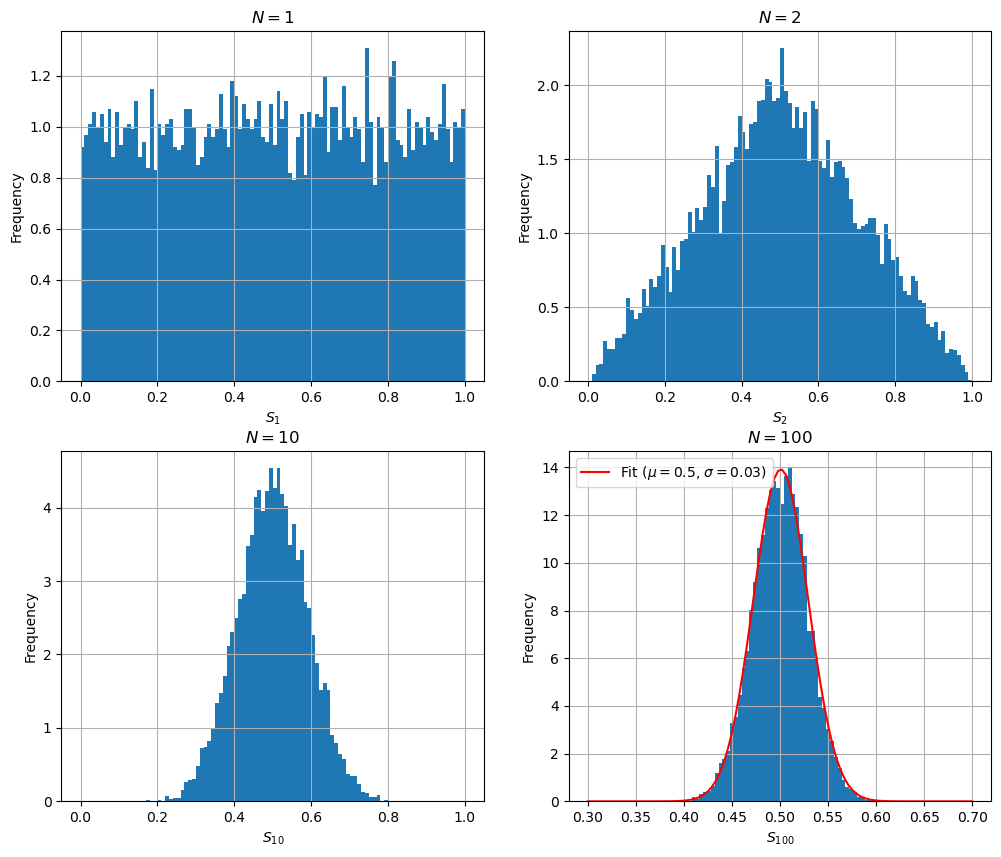

In [5]:
# defining the fitting function
def gauss(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

#define variables
n_bins = 100

#data acquisition
Uniform_1, Uniform_2, Uniform_3, Uniform_4 = np.loadtxt("../Data/01.2_standard.dat", 
                                                        usecols = (0, 1, 2, 3), unpack = 'true')

#style
plt.figure(figsize = (12, 10))

#plot
plt.subplot(2,2,1)
n, bins, patches = plt.hist(Uniform_1, n_bins, range = (0, 1), density = True)
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("$S_1$")
plt.title("$N=1$")

plt.subplot(2,2,2)
n, bins, patches = plt.hist(Uniform_2, n_bins, range = (0, 1), density = True)
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("$S_2$")
plt.title("$N=2$")

plt.subplot(2,2,3)
n, bins, patches = plt.hist(Uniform_3, n_bins, range = (0, 1), density = True)
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("$S_{10}$")
plt.title("$N=10$")

plt.subplot(2,2,4)
n, bins, patches = plt.hist(Uniform_4, n_bins, range = (0.3, 0.7), density = True)
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("$S_{100}$")
plt.title("$N=100$")

#fit
bins = np.linspace(0.3,0.7, 10001)
data_entries, bins = np.histogram(Uniform_4, bins = bins, density = True)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
popt, pcov = curve_fit(gauss, binscenters, data_entries)
xspace = np.linspace(0.3,0.7,100)
y_fit = gauss(xspace, popt[0], popt[1])

#plot fit
lab ='Fit ($\mu=$' + str(round(popt[0],2)) + ', $\sigma=$' + str(round(popt[1],2)) + ')'
plt.plot(xspace, y_fit, color = 'red',  label = lab)
plt.legend()
plt.show()

Come previsto, all'aumentare di $N$ gli istogrammi assumono una forma sempre più vicina a quella di una gaussiana. Nel grafico realtivo a $N=100$ ho mostrato anche il fit con una curva gaussiana e i relativi parametri di output ($\mu=0.5$ e $\sigma = 0.53$).

Per ottenere valori distribuiti con una distribuzione non triviale utilizzo il metodo dell'inversa della cumulativa.

#### Metodo dell'inversa della cumulativa

Il metodo di inversione della funzione cumulativa è un metodo semplice per campionare alcune distribuzioni di probabilità non banali partendo da un set di numeri generati stocastisticamente con distribuzione uniforme tra $\left[0, 1\right]$. Per applicare il metodo definisco la funzione cumulativa della distribuzione $p(x)$:
$$F(x) = \int_{-\infty}^{x} p(t)\, \mbox{d}t.$$

Si può mostrare facilmente che se $y \in [0, 1)$ è una variabile stocastica, per ottenere dei punti distirbuiti con distribuzione $p(x)$ è sufficiente invertire la funzione cumulativa:
$$ x = F^{-1}_x(y) $$

#### Distribuzione esponenziale
Nel caso distribuzione esponenziale si ha $p(x)= \lambda \exp{(-\lambda x)}$, con $x \in \left[0, 1\right]$. Allora la funzione cumulativa $F(x)$ assume la forma
$$y = F(x) = \int_{-\infty}^{x} \lambda \exp{-\lambda t}\, \mbox{d}t = 1-\exp{(-\lambda t)}, $$
e quindi la sua inversa risulta essere
$$ x = -\frac{1}{\lambda} \ln{(1-y)},$$
con $y$ estratto uniformemente tra $\left[0, 1\right]$.

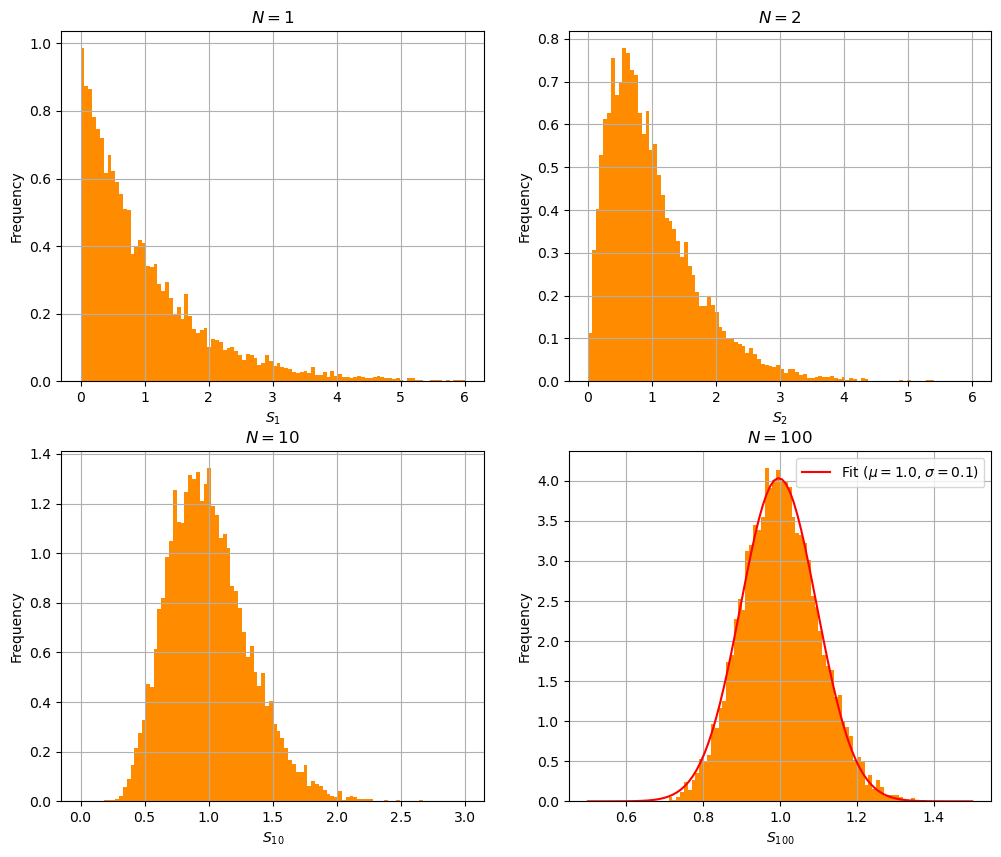

In [6]:
#data acquisition
Exp_1, Exp_2, Exp_3, Exp_4 = np.loadtxt("../Data/01.2_exponential.dat", usecols = (0,1,2,3), unpack = 'true')

#define variables
n_bins = 100

#style
plt.figure(figsize = (12,10))

#plot
plt.subplot(2,2,1)
n, bins, patches = plt.hist(Exp_1, n_bins, range = (0,6), density = True, color = 'darkorange')
plt.grid()
plt.ylabel("Frequency")
plt.title("$N=1$")
plt.xlabel("$S_1$")

plt.subplot(2,2,2)
n, bins, patches = plt.hist(Exp_2, n_bins, range = (0,6), density = True, color = 'darkorange')
plt.grid()
plt.ylabel("Frequency")
plt.title("$N=2$")
plt.xlabel("$S_2$")

plt.subplot(2,2,3)
n, bins, patches = plt.hist(Exp_3, n_bins, range = (0,3), density = True, color = 'darkorange')
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("$S_{10}$")
plt.title("$N=10$")

plt.subplot(2,2,4)
n, bins, patches = plt.hist(Exp_4, n_bins, range = (0.5,1.5), density = True, color = 'darkorange')
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("$S_{100}$")
plt.title("$N=100$")

#fit
bins = np.linspace(0.5, 1.5, 10001)
data_entries, bins = np.histogram(Exp_4, bins = bins, density = True)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins)-1)])
popt, pcov = curve_fit(gauss, xdata = binscenters, ydata = data_entries)
xspace = np.linspace(0.5, 1.5, 100)
y_fit = gauss(xspace, popt[0], popt[1])

#plot fit
lab ='Fit ($\mu=$' + str(round(popt[0], 2)) + ', $\sigma=$' + str(round(popt[1], 2)) + ')'
plt.plot(xspace, y_fit, color = 'red', label = lab)
plt.legend()
plt.show()

Come per la distribuzione uniforme, anche per la distribuzione esponenziale è evidente che vale il teorema del limite centrale.

#### Distribuzione lorentziana
Usando il metodo di inversione della funzione cumulativa si ottiene:
$$F(x) = \int_{-\infty}^{x} \frac{1}{\pi}\frac{\Gamma}{\left(t-\mu\right)^2+\Gamma^2}\, \mbox{d}t =\frac{1}{\pi} \arctan{\left(\frac{x-\mu}{\Gamma}\right)}+\frac{1}{2},$$ da cui:
$$x= \mu +\Gamma \pi \tan{\left(y-\frac{1}{2}\right)}. $$

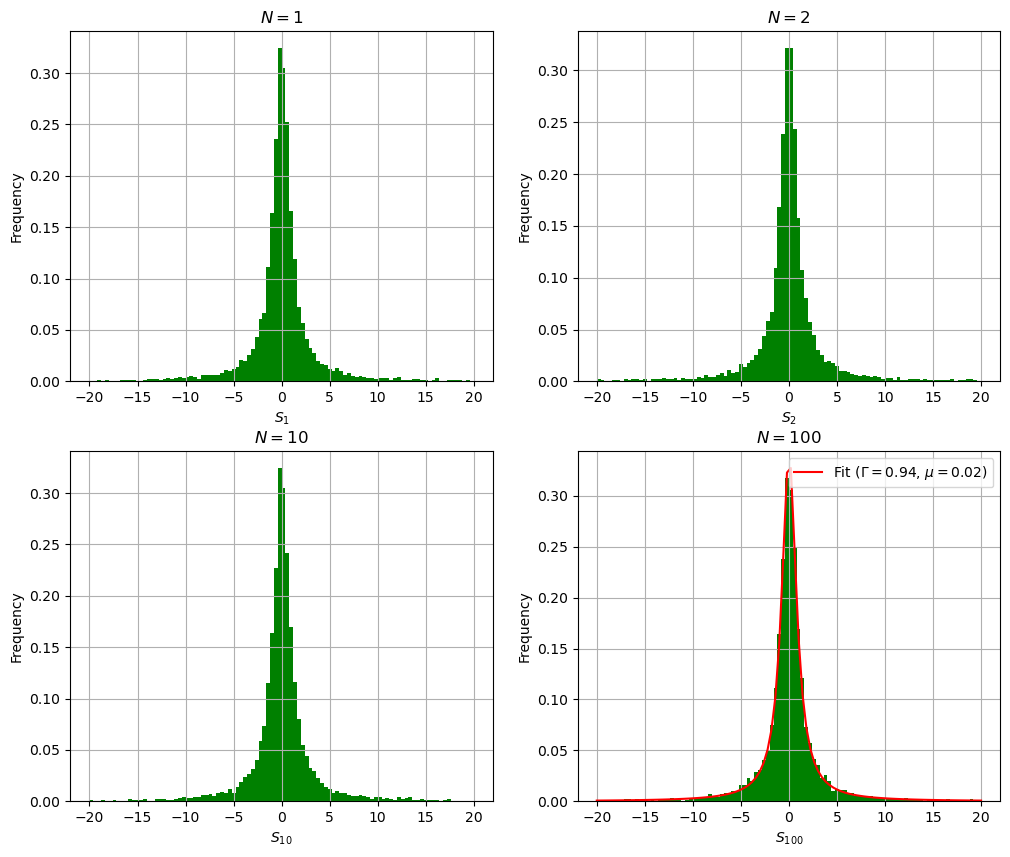

In [7]:
# defining the fitting function
def lorentz(x, gamma, x0):
    return cauchy.pdf(x, x0, gamma)

#data acquisition
Lor_1, Lor_2, Lor_3, Lor_4 = np.loadtxt("../Data/01.2_lorentzian.dat", usecols = (0,1,2,3), unpack = 'true')

#define variables
n_bins = 100

#style
plt.figure(figsize=(12,10))

#plot
plt.subplot(2,2,1)
n, bins, patches = plt.hist(Lor_1, n_bins, range = (-20, 20), density = True, color = 'green')
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("$S_1$")
plt.title("$N=1$")

plt.subplot(2,2,2)
n, bins, patches = plt.hist(Lor_2, n_bins, range = (-20, 20), density = True, color = 'green')
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("$S_2$")
plt.title("$N=2$")

plt.subplot(2,2,3)
n, bins, patches = plt.hist(Lor_3, n_bins, range = (-20, 20), density = True, color = 'green')
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("$S_{10}$")
plt.title("$N=10$")

plt.subplot(2,2,4)
n, bins, patches = plt.hist(Lor_4, n_bins, range = (-20, 20), density = True, color = 'green')
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("$S_{100}$")
plt.title("$N=100$")

#fit
bins = np.linspace(-10,10, 10001)
data_entries, bins = np.histogram(Lor_4, bins = bins, density = True)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
popt, pcov = curve_fit(lorentz, xdata = binscenters, ydata = data_entries)
xspace = np.linspace(-20,20,100)
y_fit = lorentz(xspace, *popt)

#plot
lab = 'Fit ($\Gamma=$' + str(round(popt[0],2)) + ', $\mu=$' + str(round(popt[1],2)) + ')'
plt.plot(xspace, y_fit, color = 'red',  label = lab)
plt.legend()
plt.show()

In questo caso la distribuzione lorenziana si svincola dalle ipotesi del Teorema del Limite Centrale e non converge ad una gaussiana (a causa della varianza non finita della distribuzione). Il fit eseguito produce, infatti, parametri lorentziani, che vanno a confermare la bontà del generatore (si era richiesto $\Gamma=1$ e $\mu = 0$).

## Esercizio 01.3
- **Simulate** the Buffon’s experiment:  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$. If possible, do not use $\pi$ to evaluate $\pi$.

### Risoluzione
Per simulare questo esperimento suppongo di avere due righe soltanto distanti $1$ e un ago di lunghezza $0.8$. La posizione dell'ago è identificata dalla posizione del suo punto medio $y_0$ (generata stocasticamente a partire da una distribuzione uniforme tra $0$ e $1$), mentre l'orientamento è individuato dall'angolo $\theta$ che l'ago forma con la verticale. L'angolo $\theta$ assume valori tra $0$ e $\pi$, per cui, visto che lo scopo dell'esercizio è proprio calcolare $\pi$, non è sensato generare questo valore stocasticamente a partire da una distribuzione uniforme su $[0, \pi]$. Per calcolare $\theta$, quindi, utilizzo due valori stocastici $x \in [0, 1]$ e $y \in [-1, 1)$ tali per cui $x^2+y^2<1$ e calcolo $\cos{\theta} = \frac{y}{\sqrt{x^2+y^2}}$. 

Riesco poi a capire se l'intersezione con le righe è avvenuta attraverso la seguente espressione booleana:

```c++
std::floor(y_0 + (L/2. * cos_theta)) != std::floor(y_0 - (L/2. * cos_theta))

```

Riporto di seguito il risultato di questa simulazione di esperimento.

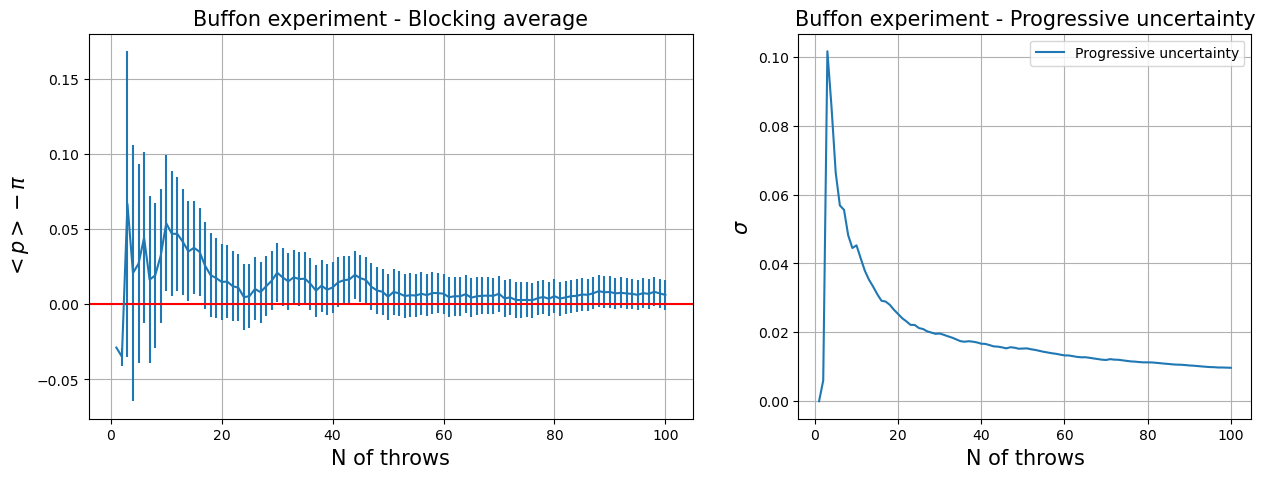

In [8]:
#data acquisition
x_label, progressive_sum, progressive_error = np.loadtxt('../Data/01.3_buffon.dat', usecols = (0,1,2), 
                                                         unpack = True)

#style
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1.5]}, figsize = (15, 5))

#plot 1
axs[0].errorbar(x_label, progressive_sum - np.pi, yerr = progressive_error, label = "Blocking average")
axs[0].axhline(0, ls = '-',c = 'red', label = "Exact value")
#style plot 1
axs[0].set_xlabel('N of throws', fontsize = 15)
axs[0].set_ylabel('$<p> - \pi$', fontsize = 15)
axs[0].grid(True)
axs[0].set_title('Buffon experiment - Blocking average', fontsize = 15)

#plot 2
axs[1].plot(x_label, progressive_error, label = "Progressive uncertainty")
#style plot 2
axs[1].set_ylabel('$\sigma$', fontsize = 15)
axs[1].set_xlabel('N of throws', fontsize = 15)
axs[1].set_title('Buffon experiment - Progressive uncertainty', fontsize = 15)
axs[1].grid(True)

#legend
plt.legend()

plt.show()

Come si può notare, i risultati sono compatibili con $\pi$.